In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from statsmodels.tsa.stattools import acf, pacf

def my_plot_acf(s, nlags=20):
    s_acf = acf(s, nlags=nlags)
    print(s_acf)
    plt.plot(s_acf, 'r+')
    plt.axhline(y=-1.96/np.sqrt(len(s)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(s)),linestyle='--',color='gray')
    plt.show()

# Simulation

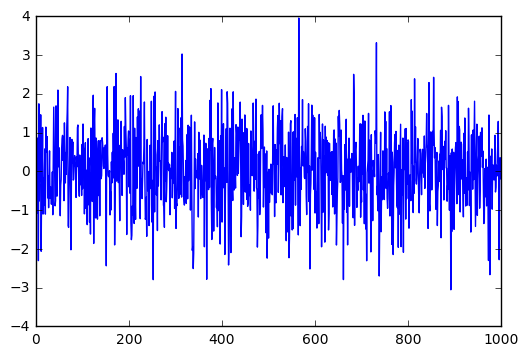

In [2]:
# white noise. Gaussian
n = 1000
np.random.seed(1)
w = np.random.normal(0, 1, n)
plt.plot(w)
plt.show()

sim_w = pd.Series(w)

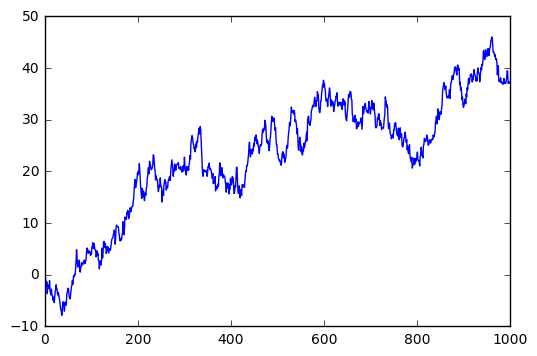

In [3]:
# simple random walk
# x(t) = x(t-1) + w(t)

n = 1000
np.random.seed(1)

w = np.random.normal(0, 1, n)
x = np.zeros(n)
for i in range(1,n):
    x[i] = x[i-1] + w[i]
plt.plot(x)

plt.show()

sim_rw = pd.Series(x)

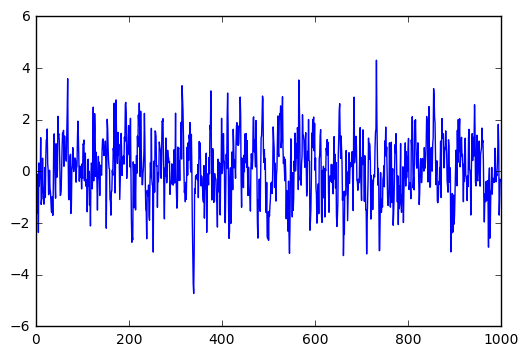

In [4]:
# ar(1)
# x(t) = 0.6 * x(t-1) + w(t)

n = 1000
np.random.seed(1)

w = np.random.normal(0, 1, n)
x = np.zeros(n)
for i in range(1,n):
    x[i] = 0.6* x[i-1] + w[i]
plt.plot(x)

plt.show()

sim_ar1 = pd.Series(x)

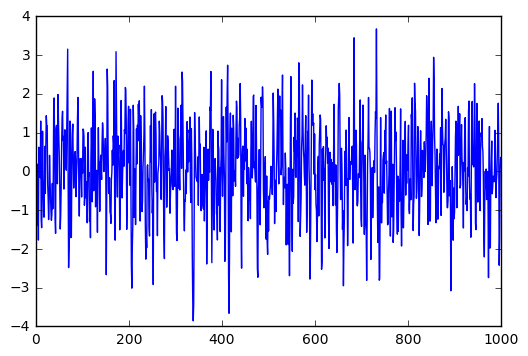

In [5]:
# ar(2)
# x(t) = 0.6 * x(t-1) + 0.2 * x(t-2) + w(t)

n = 1000
np.random.seed(1)

w = np.random.normal(0, 1, n)
x = np.zeros(n)
for i in range(2,n):
    x[i] = 0.6* x[i-1]-0.3* x[i-2] + w[i]
plt.plot(x)

plt.show()

sim_ar2 = pd.Series(x)

# Air Passengers

In [6]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
#df = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates='Month', date_parser=dateparse)

In [7]:
df = pd.read_csv('AirPassengers.csv')

In [8]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
df.shape

(144, 2)

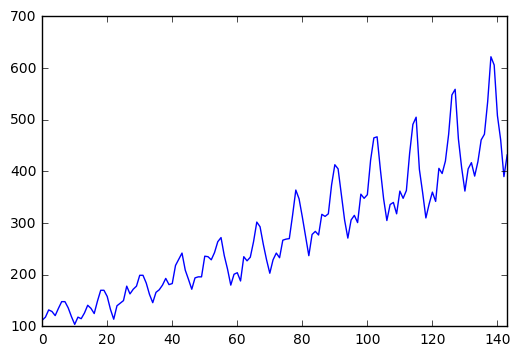

In [10]:
y_ap = df.Passengers
y_ap.plot()
plt.show()

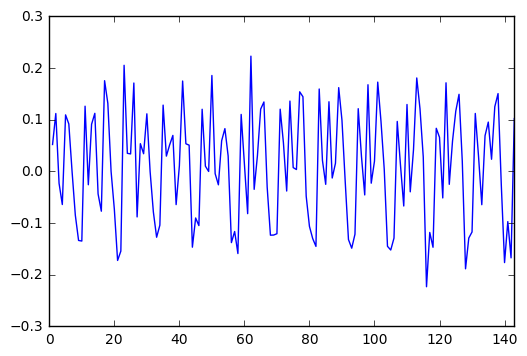

In [11]:
y_ap_log = np.log(y_ap)
y_ap_log_diff = (y_ap_log-y_ap_log.shift(1))
y_ap_log_diff.plot()
plt.show()

# AR, MA, ARMA, ARIMA

In [12]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [13]:
ar1_model = ARMA(sim_ar1.values, order=(1,0))
arma_result = ar1_model.fit()
arma_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1398.391
Method:                       css-mle   S.D. of innovations              0.979
Date:                Wed, 29 Mar 2017   AIC                           2802.782
Time:                        11:08:15   BIC                           2817.505
Sample:                             0   HQIC                          2808.377
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0928      0.074      1.258      0.209        -0.052     0.237
ar.L1.y        0.5805      0.026     22.579      0.000         0.530     0.631
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7225           +0.0000j            1.7225            0.0000
-----------------------------------------------------------------------------
"""

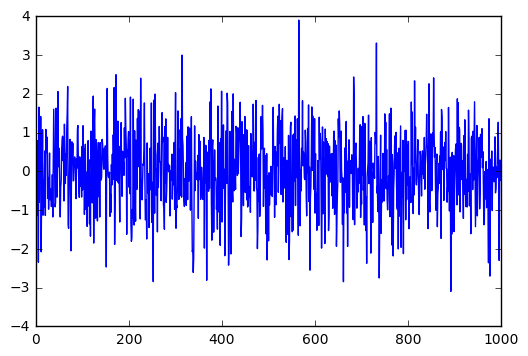

In [14]:
ar1_res = arma_result.resid
plt.plot(ar1_res)
plt.show()

[  1.00000000e+00  -8.92452168e-03   3.04380312e-02  -3.55058581e-02
   4.07273782e-02  -2.16626477e-02   1.96957265e-02  -4.21370149e-02
  -1.71730434e-02  -2.71493453e-02  -2.69651847e-02   3.12080431e-04
  -6.57732308e-02   1.05570647e-02  -2.18518133e-02   2.30413662e-02
  -5.56484152e-02   1.25604911e-02  -1.57974427e-03   4.42670673e-02
   1.15471912e-02]


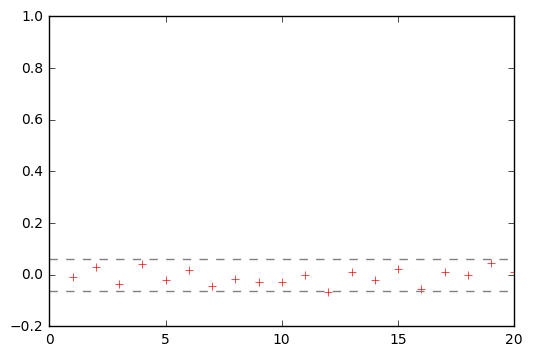

In [26]:
my_plot_acf(ar1_res)

In [28]:
arma_mod = ARMA(sim_ar2.values, order=(2,0))
arma_res = arma_mod.fit()
arma_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 0)   Log Likelihood               -1398.189
Method:                       css-mle   S.D. of innovations              0.979
Date:                Wed, 29 Mar 2017   AIC                           2804.378
Time:                        11:09:18   BIC                           2824.010
Sample:                             0   HQIC                          2811.840
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0540      0.043      1.244      0.214        -0.031     0.139
ar.L1.y        0.5784      0.030     19.134      0.000         0.519     0.638
ar.L2.y       -0.2919      0.030     -9.664      0.000        -0.351    -0.233
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9907           -1.5634j            1.8509           -0.1601
AR.2            0.9907           +1.5634j            1.8509            0.1601
-----------------------------------------------------------------------------
"""

[ 1.          0.58104175  0.34842627  0.18658379  0.12183932  0.04828242
  0.01411043 -0.03865512 -0.05527793 -0.06916797 -0.07299367 -0.06821043
 -0.08431398 -0.05075353 -0.0448999  -0.02776914 -0.04525651 -0.01289706
  0.00125648  0.01755748 -0.01100238]


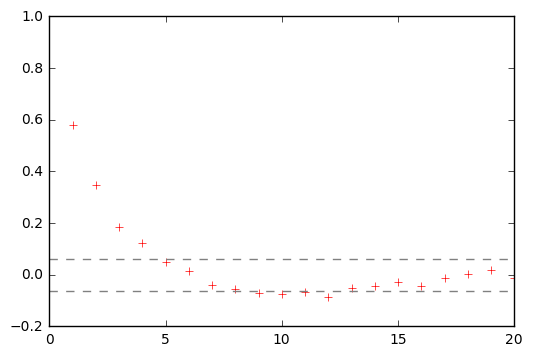

In [29]:
my_plot_acf(sim_ar1)

[ 1.          0.44790526 -0.03315785 -0.16915849 -0.06835549  0.00262621
  0.02078152 -0.02363817 -0.03995399 -0.04092934 -0.03480908 -0.03336692
 -0.0503479  -0.01349139 -0.00314172 -0.00867375 -0.04512486 -0.01010255
  0.03442047  0.06224382  0.01100909]


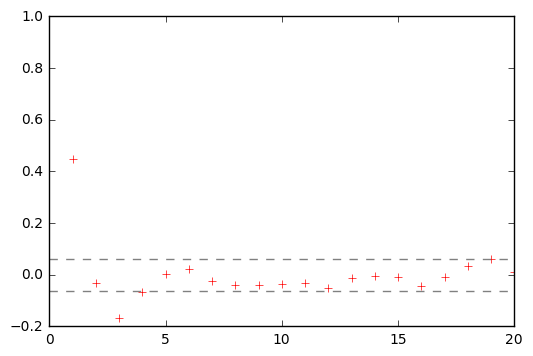

In [30]:
my_plot_acf(sim_ar2)

[ 1.         -0.02942313  0.01891513 -0.04466145  0.03939853 -0.02798478
  0.02280447 -0.04353921 -0.01539121 -0.02620451 -0.02290342 -0.00110279
 -0.06562461  0.01180041 -0.01913428  0.02265693 -0.05622198  0.01175489
 -0.0016764   0.04596965  0.01025659]


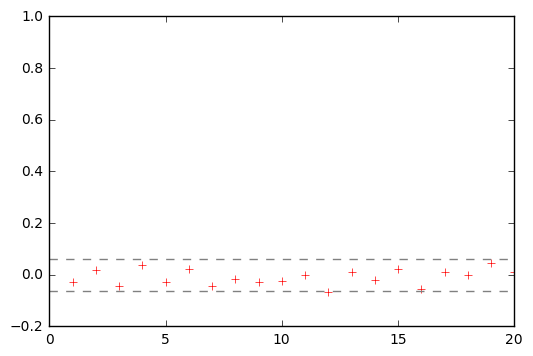

In [31]:
my_plot_acf(w)

# Yahoo Finance

In [32]:
import pandas_datareader.data as web
import datetime

In [33]:
stocks = ['ORCL', 'TSLA', 'IBM','YELP', 'MSFT', 'AAPL', 'GOOG']

In [34]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 27)

ms = web.DataReader("MSFT", 'yahoo', start, end)
apple = web.DataReader("AAPL", 'yahoo', start, end)
google = web.DataReader("GOOG", 'yahoo', start, end)

In [35]:
ms.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,38409100,25.555485
2010-01-05,30.850000,31.100000,30.639999,30.959999,49749600,25.563741
2010-01-06,30.879999,31.080000,30.520000,30.770000,58182400,25.406859
2010-01-07,30.629999,30.700001,30.190001,30.450001,50559700,25.142634
2010-01-08,30.280001,30.879999,30.240000,30.660000,51197400,25.316031


In [36]:
ms.shape

(771, 6)

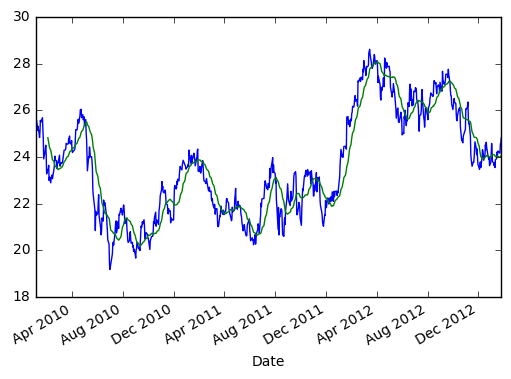

In [37]:
y_ms = ms['Adj Close']
y_ap = apple['Adj Close']
y_go = google['Adj Close']

y_ms.plot()
y_ms.rolling(window=20).mean().plot()

plt.show()

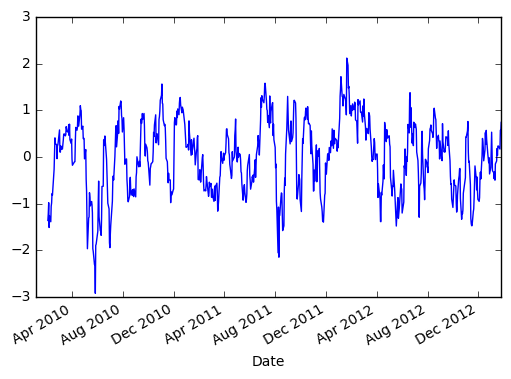

In [38]:
y_ms_res = y_ms -y_ms.rolling(window=20).mean()
y_ms_res.plot()
plt.show()

[ 1.          0.91359899  0.83000581  0.73890066  0.64853696  0.57011049
  0.50322089  0.44375478  0.38367298  0.32956876  0.28185695  0.23265686
  0.18510012  0.13711632  0.09128996  0.04765701  0.00297637 -0.02184695
 -0.03720567 -0.0405319  -0.032199  ]


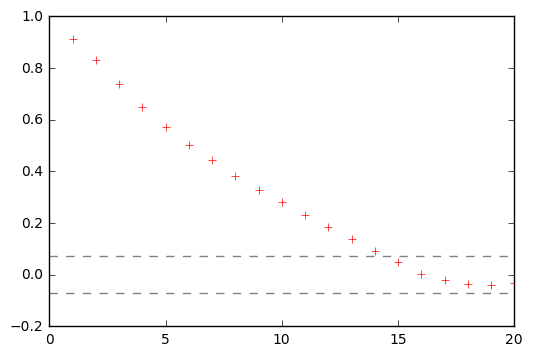

In [39]:
my_plot_acf(y_ms_res.dropna())

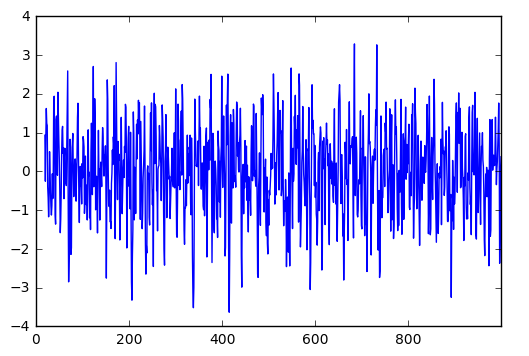

In [40]:
ar2_res = sim_ar2 - sim_ar2.rolling(window=20).mean()
ar2_res.plot()
plt.show()

[ 1.          0.45865266 -0.02223069 -0.15815207 -0.06775133  0.00311933
  0.0163458  -0.03034034 -0.0566676  -0.06232057 -0.06113085 -0.06279829
 -0.08741024 -0.05683755 -0.05190202 -0.06442607 -0.10373371 -0.07724107
 -0.03617054  0.01147462  0.00762913]


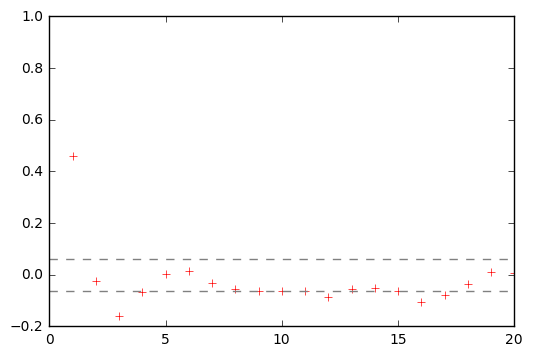

In [41]:
my_plot_acf(ar2_res.dropna())

In [42]:
def diff(s):
    return (s - s.shift(1)).dropna()

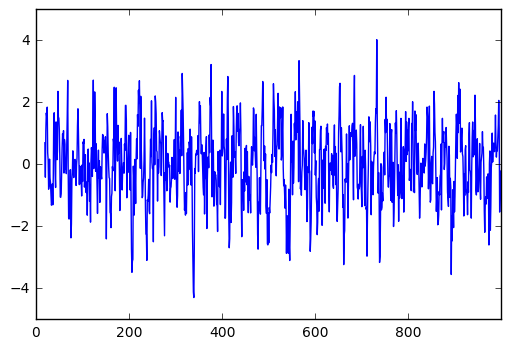

In [43]:
ar1_res = sim_ar1 - sim_ar1.rolling(window=20).mean()
ar1_res.plot()
plt.show()

[ 1.          0.59373374  0.35683759  0.195767    0.11812067  0.04185639
 -0.00541666 -0.0663557  -0.09983053 -0.12541707 -0.14490716 -0.15174874
 -0.18270276 -0.16157109 -0.16643913 -0.15907196 -0.17589926 -0.14034889
 -0.11451886 -0.07443249 -0.05687563]


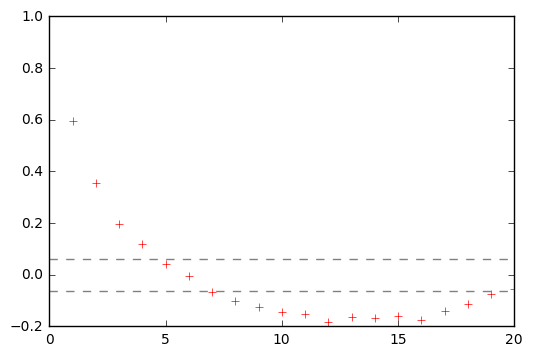

In [44]:
my_plot_acf(ar1_res.dropna())

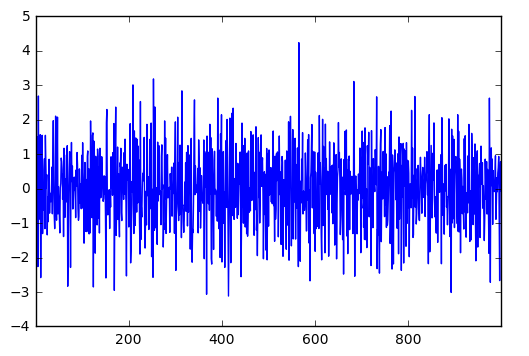

In [45]:
ar1_res = diff(sim_ar1)
ar1_res.plot()
plt.show()

[ 1.          0.45865266 -0.02223069 -0.15815207 -0.06775133  0.00311933
  0.0163458  -0.03034034 -0.0566676  -0.06232057 -0.06113085 -0.06279829
 -0.08741024 -0.05683755 -0.05190202 -0.06442607 -0.10373371 -0.07724107
 -0.03617054  0.01147462  0.00762913]


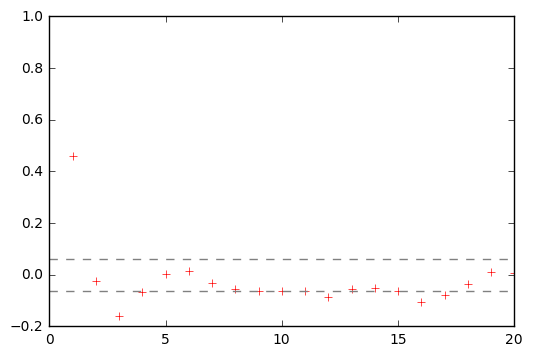

In [46]:
my_plot_acf(ar2_res.dropna())

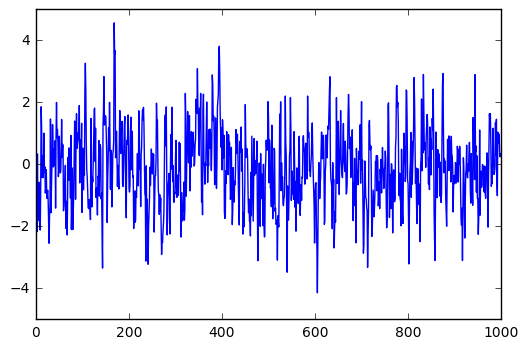

In [47]:
# ar(1)
# x(t) = 0.6 * x(t-1) + w(t)

n = 1000
np.random.seed(2)

w = np.random.normal(0, 1, n)
x = np.zeros(n)
for i in range(1,n):
    x[i] = 0.6* x[i-1] + w[i]
plt.plot(x)

plt.show()

sim_ar1_1 = pd.Series(x)

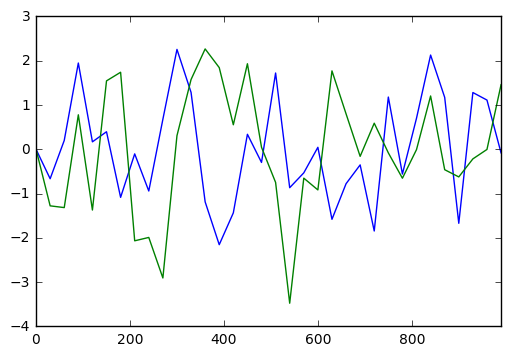

In [48]:
sim_ar1[::30].plot()
sim_ar1_1[::30].plot()
plt.show()

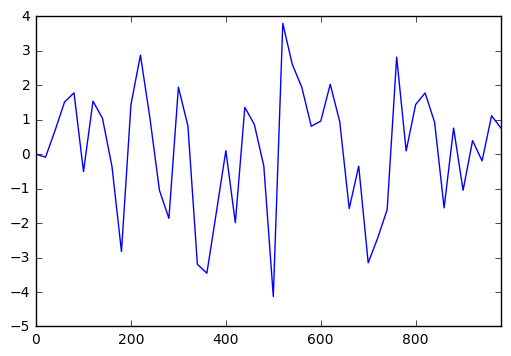

In [49]:
ar1_res = sim_ar1 - sim_ar1_1
ar1_res[::20].plot()
plt.show()


[ 1.          0.55704156  0.31182289  0.15612744  0.09185772  0.04875405
  0.03003225  0.01979782  0.03479863  0.03758554  0.04899577  0.0296519
 -0.01113363  0.00476484  0.02697439  0.02458828 -0.01595149  0.0163297
  0.00873327  0.02373295  0.02625378]


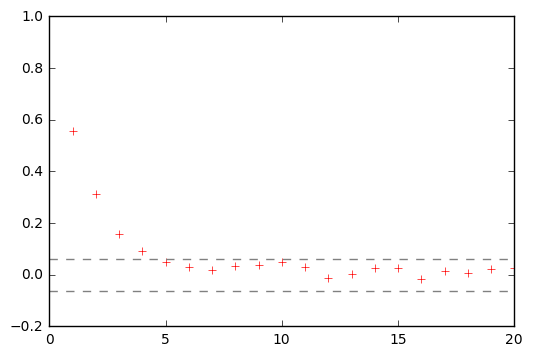

In [50]:
my_plot_acf(ar1_res)

In [52]:
from arch import arch_model

ImportError: No module named 'arch'